In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.loadtxt('ex3x.dat', dtype=np.float32)
y = np.loadtxt('ex3y.dat', dtype=np.float32)

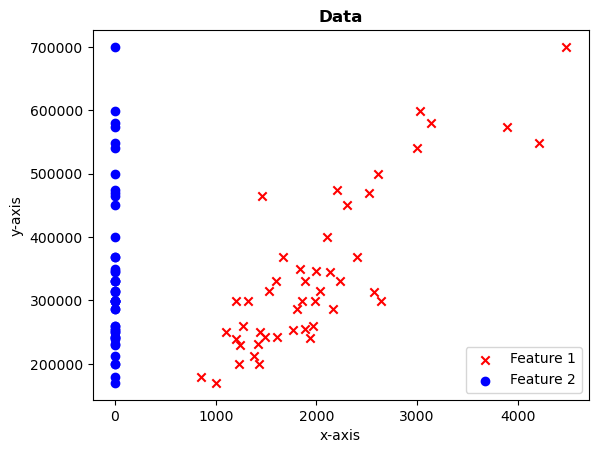

In [15]:
plt.scatter(x[:, 0], y , marker="x", c ='r', label="Feature 1")
plt.scatter(x[:, 1], y , marker='o', c='b', label="Feature 2")
plt.title("Data", fontweight = "bold")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()